# IMPORTING LIBRARIES

In [1]:
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append("../")
from helper_functions import *

# IMPORTING DATA

In [3]:
x_train = np.load("Data/xtrain.npy")
y_test = np.load("Data/ytest.npy")
x_test = np.load("Data/xtest.npy")
y_train = np.load("Data/ytrain.npy")

In [4]:
x = np.vstack([x_train, x_test])
y = np.hstack([y_train, y_test])

In [5]:
x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)
x.shape, y.shape

((7874, 768), (7874,))

In [6]:
from sklearn.utils import shuffle

x,y = shuffle(x,y)
x_test, y_test = shuffle(x_test, y_test)

In [24]:
from sklearn.utils import compute_class_weight

weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
weights = {index:value for index,value in enumerate(weights)}
weights

{0: 0.6519291273389634,
 1: 1.3608710680954026,
 2: 1.2602432778489117,
 3: 2.074835309617918,
 4: 0.6133831892186647,
 5: 1.5328012458633444,
 6: 2.309090909090909,
 7: 0.7755343248300994,
 8: 1.1202162469768104,
 9: 0.741012610577828,
 10: 0.8275354703100368}

# FINE-TUNING

## Logistic Regression

### Training Finetuned Model

                 Model Performance
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       208
           1       0.64      0.74      0.68       106
           2       0.53      0.51      0.52       106
           3       0.51      0.48      0.50        56
           4       0.71      0.87      0.78       235
           5       0.72      0.69      0.71        95
           6       0.63      0.45      0.53        58
           7       0.73      0.78      0.75       206
           8       0.80      0.71      0.75       129
           9       0.56      0.40      0.47       188
          10       0.91      0.95      0.93       188

    accuracy                           0.70      1575
   macro avg       0.67      0.66      0.66      1575
weighted avg       0.70      0.70      0.69      1575

Accuracy = 70.22%


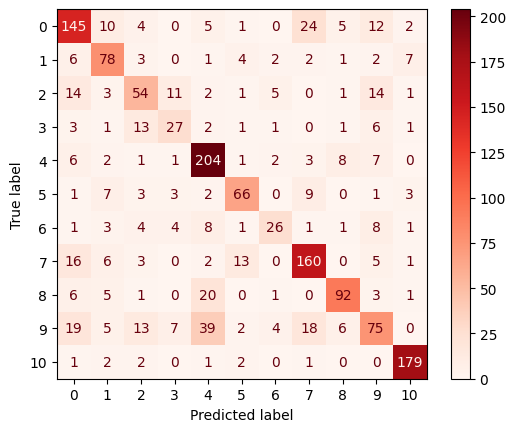

In [34]:
lreg_ft = LogisticRegression(C=0.3, max_iter=2000, penalty='l2', solver='liblinear')
lreg_ft.fit(x_train, y_train)
performance(lreg_ft, x_test, y_test)

                 Model Performance
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       208
           1       0.66      0.75      0.70       106
           2       0.55      0.51      0.53       106
           3       0.50      0.45      0.47        56
           4       0.77      0.83      0.80       235
           5       0.68      0.68      0.68        95
           6       0.60      0.55      0.58        58
           7       0.73      0.76      0.75       206
           8       0.80      0.72      0.76       129
           9       0.51      0.46      0.48       188
          10       0.91      0.95      0.93       188

    accuracy                           0.70      1575
   macro avg       0.67      0.67      0.67      1575
weighted avg       0.70      0.70      0.70      1575

Accuracy = 70.1%


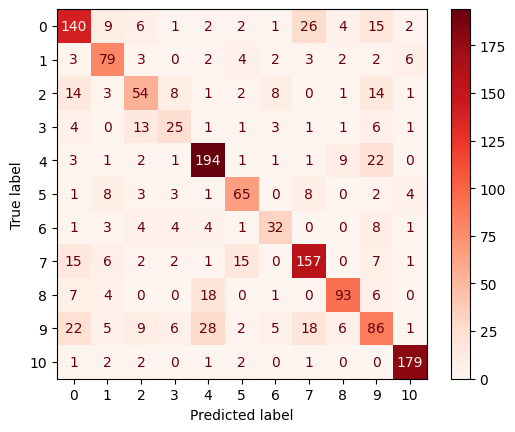

In [39]:
gr = LogisticRegression()
gr.fit(x_train, y_train)
performance(gr, x_test, y_test)

### Comparison with standard model using cross_validate

In [21]:
from sklearn.model_selection import cross_validate

model = joblib.load("Models/Initial/Unweighted/Logistic Regression.pk1")
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=2)
cv4['test_score'].mean()

0.6708896713962726

In [22]:
model = joblib.load("Models/Initial/Weighted/Logistic Regression.pk1")
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=2)
cv4['test_score'].mean()

0.6600781535713869

In [23]:
model = LogisticRegression(C=0.3, max_iter=2000, penalty='l2', solver='liblinear')
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=2)
cv4['test_score'].mean()

0.6728840114412727

In [25]:
model = LogisticRegression(class_weight=weights ,C=0.3, max_iter=2000, penalty='l2', solver='liblinear')
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=2)
cv4['test_score'].mean()

0.6703770763597146

In [28]:
model = LogisticRegression(class_weight = weights, max_iter = 1000)
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=2)
cv4['test_score'].mean()

0.6660111652223974

In [30]:
model = LogisticRegression(class_weight = weights, max_iter = 3000)
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=3)
cv4['test_score'].mean()

0.6661316381489839

In [32]:
model = LogisticRegression(C=0.3, max_iter=2000, penalty='l2', solver='liblinear')
cv4 = cross_validate(model, x, y, cv=5, scoring='accuracy', n_jobs=2)
cv4['test_score'].mean()

0.6799582904741737

In [33]:
model = LogisticRegression()
cv4 = cross_validate(model, x, y, cv=5, scoring='accuracy', n_jobs=2)
cv4['test_score'].mean()

0.6742435207034954

## LightGBM

### Training Finetuned Model

                 Model Performance
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       208
           1       0.65      0.72      0.68       106
           2       0.51      0.45      0.48       106
           3       0.57      0.41      0.48        56
           4       0.68      0.79      0.73       235
           5       0.72      0.72      0.72        95
           6       0.55      0.38      0.45        58
           7       0.71      0.77      0.74       206
           8       0.74      0.67      0.71       129
           9       0.50      0.45      0.47       188
          10       0.93      0.95      0.94       188

    accuracy                           0.68      1575
   macro avg       0.66      0.63      0.64      1575
weighted avg       0.67      0.68      0.67      1575

Accuracy = 67.87%


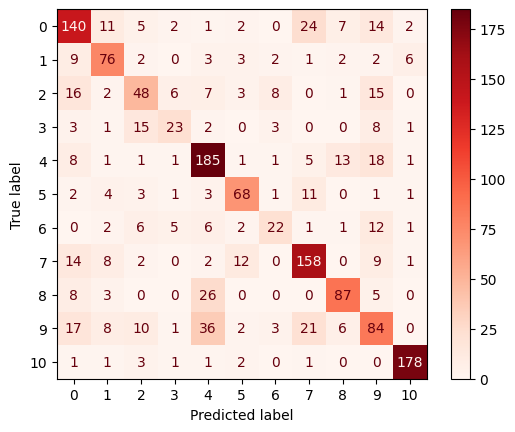

In [36]:
light = LGBMClassifier(colsample_bytree=0.8, max_depth=7, learning_rate=0.1, n_estimators=300, subsample=0.8)
light.fit(x_train, y_train)
performance(light, x_test, y_test)

In [37]:
light_weighted = LGBMClassifier(class_weight=weights, colsample_bytree=0.8, max_depth=7, learning_rate=0.1, n_estimators=300, subsample=0.8)

In [38]:
light_default = LGBMClassifier()
light_def_w = LGBMClassifier(class_weight = weights)

In [39]:
cvld = cross_validate(light_default, x, y, scoring='f1_weighted', n_jobs = 3)
cvld['test_score'].mean()

0.644975856590887

In [40]:
cvldw = cross_validate(light_def_w, x, y, scoring='f1_weighted', n_jobs = 3)
cvldw['test_score'].mean()

0.6553677280866055

In [41]:
cvlw = cross_validate(light_weighted, x, y, scoring='f1_weighted', n_jobs = 3)
cvlw['test_score'].mean()

0.66350711949183

In [42]:
cvl = cross_validate(light, x, y, scoring='f1_weighted', n_jobs = 3)
cvl['test_score'].mean()

0.660406101978489

In [44]:
cvlw = cross_validate(light_weighted, x, y, scoring='accuracy', n_jobs = 3)
cvlw['test_score'].mean()

0.6691622193985598

In [45]:
cvld = cross_validate(light_default, x, y, scoring='accuracy', n_jobs = 3)
cvld['test_score'].mean()

0.6508756983521913

# Evaluation Set